In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import spearmanr, ttest_ind
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = 'Malgun Gothic'

%precision 3
%matplotlib inline

In [27]:
data = pd.read_csv("../data/data_mental.csv")

#변수 추출
data = data[['PHQ_점수', 'GAD_점수','스트레스_인지','아침식사빈도','점심식사빈도','저녁식사빈도',
             '음주빈도_1년','물섭취량_하루','과일섭취빈도_1년','채소섭취빈도_1년','식이보충제복용여부_1년','위험군_분류']]

#결측치, 이상치 제거
data.dropna()

data

,PHQ_점수,GAD_점수,스트레스_인지,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,위험군_분류
0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,정상
1,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,정상
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,정상
3,3.0,3.0,1.0,3.0,1.0,1.0,1.0,2.5,6.0,2.0,2.0,정상
4,0.0,3.0,0.0,1.0,1.0,1.0,8.0,6.0,1.0,1.0,1.0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...
4407,5.0,16.0,1.0,4.0,1.0,2.0,4.0,5.0,7.0,5.0,2.0,위험
4408,15.0,9.0,1.0,2.0,1.0,1.0,5.0,7.5,7.0,1.0,2.0,위험
4409,9.0,21.0,1.0,1.0,1.0,1.0,1.0,7.5,2.0,1.0,1.0,위험
4410,15.0,0.0,1.0,1.0,1.0,1.0,8.0,5.0,2.0,1.0,1.0,위험


In [28]:
column = data.columns
column = list(column)
column = [
 '아침식사빈도',
 '점심식사빈도',
 '저녁식사빈도']
for c in column :
    print(data[c].value_counts())

아침식사빈도
1.0    2528
4.0     790
3.0     434
2.0     405
Name: count, dtype: int64
점심식사빈도
1.0    3750
2.0     225
3.0     104
4.0      78
Name: count, dtype: int64
저녁식사빈도
1.0    3783
2.0     269
3.0      68
4.0      37
Name: count, dtype: int64


In [29]:
data['아침식사빈도'].value_counts()

아침식사빈도
1.0    2528
4.0     790
3.0     434
2.0     405
Name: count, dtype: int64

# 1. 식사빈도

## 1) 기술통계
아침,점식,저녁식사빈도에 해당하는 번호 경우 해당 조사의 설문지이므로 해당 번호의 빈도가
주된 요소라고 판단, 각 식사빈도의 최빈값을 구해보았다.

In [30]:
#아침식사 빈도 결측치 제거
data['아침식사빈도'] = data['아침식사빈도'].replace(9, pd.NA)
data = data.dropna(subset=['아침식사빈도'])

mode_val = data['아침식사빈도'].mode()[0]
print("mode :", mode_val)

mode : 1.0


In [31]:
#점심식사 빈도 결측치 제거
data['점심식사빈도'] = data['점심식사빈도'].replace(9, pd.NA)
data = data.dropna(subset=['점심식사빈도'])

mode_val = data['점심식사빈도'].mode()[0]
print("mode :", mode_val)

mode : 1.0


/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_69655/1627823013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['점심식사빈도'] = data['점심식사빈도'].replace(9, pd.NA)


In [32]:
#저녁식사 빈도 결측치 제거
data['저녁식사빈도'] = data['저녁식사빈도'].replace(9, pd.NA)
data = data.dropna(subset=['저녁식사빈도'])

mode_val = data['저녁식사빈도'].mode()[0]
print("mode :", mode_val)

mode : 1.0


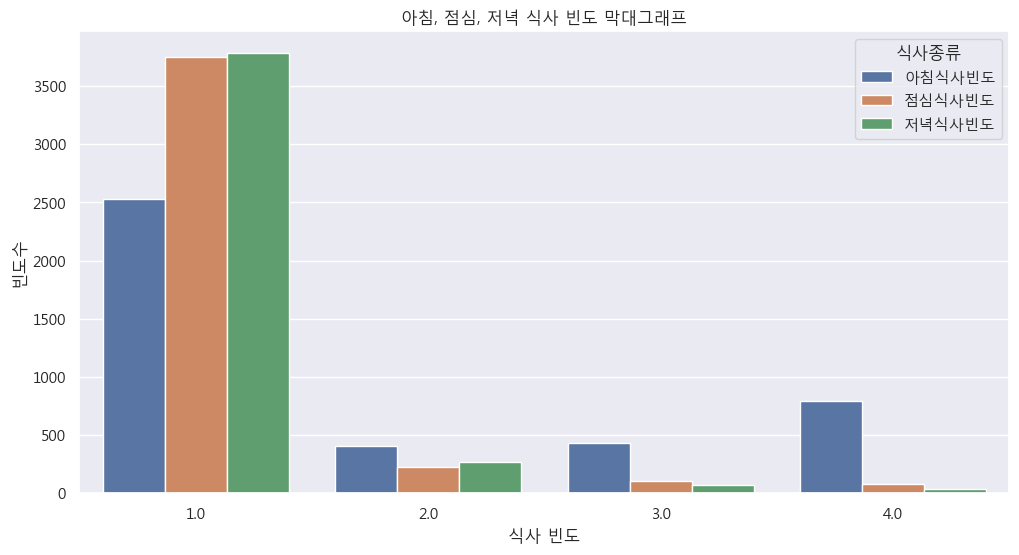

In [33]:
# 아침, 점심, 저녁 식사 빈도 
data_meal = data[['아침식사빈도', '점심식사빈도', '저녁식사빈도']].melt(var_name='식사종류', value_name='빈도')

# 식사빈도 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=data_meal, x='빈도', hue='식사종류')
plt.title("아침, 점심, 저녁 식사 빈도 막대그래프")
plt.xlabel("식사 빈도")
plt.ylabel("빈도수")
plt.show()

1 : 주 5-7 회 , 2: 주 3-4 회 , 3 : 주 1-2 회 , 4: 거의 안한다(주 0회)
빈도상으로 아침,점심,저녁 모두 주 5~7회가 가장 높게 나왔으며 아침 대비 점심, 저녁의 빈도가 높은것으로 나타났다

In [34]:
def yy(value):
    if value == 1 :
        return '항상'
    elif value == 2 :
        return '중간'
    elif value == 3 :
        return '적음'
    else :
        return '먹지않음'
    
columnz = ['아침식사빈도', '점심식사빈도', '저녁식사빈도']

for c in columnz:
    data[f'{c}_범주형'] = data[c].apply(yy)

## 2) 정신건강 위험군 분류에 따른 식사빈도
PHQ, GAD 검사의 수치적인 점수에 기반하여 각 식사별 상관계수와 pvalue 값을 구해보았다

In [35]:
#아침
B_PHQ_corr, B_PHQ_pvalue = stats.spearmanr(data['PHQ_점수'], data['아침식사빈도'])
B_GAD_corr, B_GAD_pvalue = stats.spearmanr(data['GAD_점수'], data['아침식사빈도'])

#점심
L_PHQ_corr, L_PHQ_pvalue = stats.spearmanr(data['PHQ_점수'], data['점심식사빈도'])
L_GAD_corr, L_GAD_pvalue = stats.spearmanr(data['GAD_점수'], data['점심식사빈도'])

#저녁
D_PHQ_corr, D_PHQ_pvalue = stats.spearmanr(data['PHQ_점수'], data['저녁식사빈도'])
D_GAD_corr, D_GAD_pvalue = stats.spearmanr(data['GAD_점수'], data['저녁식사빈도'])

res_df = pd.DataFrame({
    '식사 종류' :['아침','아침','점심','점심','저녁','저녁'],
    '변수': ['PHQ_점수', 'GAD_점수','PHQ_점수', 'GAD_점수','PHQ_점수', 'GAD_점수'],
    '스피어만 상관계수': [B_PHQ_corr, B_GAD_corr, L_PHQ_corr, L_GAD_corr, D_PHQ_corr, D_GAD_corr],
    'p-value': [B_PHQ_pvalue, B_GAD_pvalue, L_PHQ_pvalue, L_GAD_pvalue, D_PHQ_pvalue, D_GAD_pvalue]
})

res_df

,식사 종류,변수,스피어만 상관계수,p-value
0,아침,PHQ_점수,0.138491,2.972807e-19
1,아침,GAD_점수,0.197084,1.125817e-37
2,점심,PHQ_점수,0.096680,4.205326e-10
3,점심,GAD_점수,0.087917,1.365229e-08
4,저녁,PHQ_점수,0.059874,1.121461e-04
5,저녁,GAD_점수,0.075146,1.232107e-06


아침, 점심, 저녁 모두 p-value 값이 0.05보다 낮아 통계적으로 유의미 하나 상관계수 값이 작아 식사 종류의빈도와 PHQ, GAD 점수간의 상관관계는 낮은것을 확인 할 수 있다.

## (수정) 샘플 추출

In [36]:
# '위험' 그룹의 표본 수를 기준으로 '정상' 및 '중증' 그룹에서 동일한 수만큼 무작위 추출
normal = data[data['위험군_분류'] == '정상']
mid = data[data['위험군_분류'] == '중증']
risk = data[data['위험군_분류'] == '위험']

n = len(risk)

sample_n = normal.sample(n = n, replace= False, random_state= 42)
sample_m = mid.sample(n = n, replace= False, random_state= 42)

sample = pd.concat([sample_n, sample_m, risk])

## (수정) 아침식사빈도 그래프 추출

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '먹지않음'),
  Text(0, 1.5, '적음'),
  Text(0, 2.5, '중간'),
  Text(0, 3.5, '항상')])

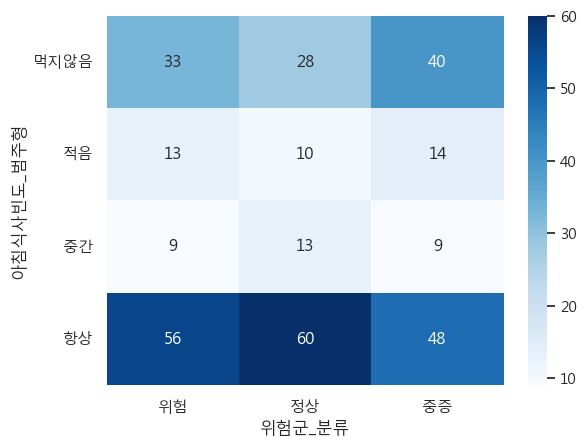

In [37]:
# 원본에서 '정상' 그룹의 크기가 많기 때문에 샘플 이용
ct = pd.crosstab(sample['아침식사빈도_범주형'], sample['위험군_분류'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.yticks(rotation = 0)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '먹지않음'),
  Text(0, 1.5, '적음'),
  Text(0, 2.5, '중간'),
  Text(0, 3.5, '항상')])

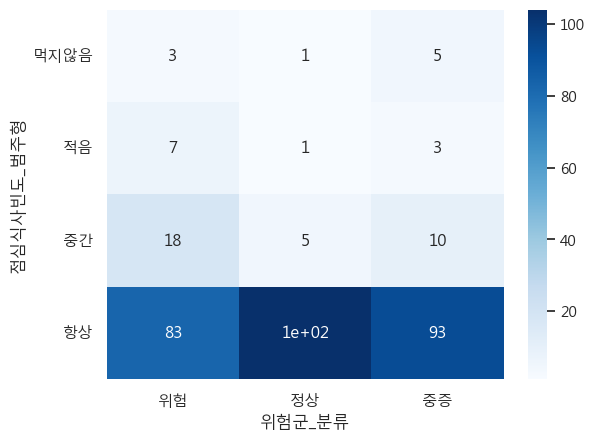

In [38]:
# 원본에서 '정상' 그룹의 크기가 많기 때문에 샘플 이용
ct = pd.crosstab(sample['점심식사빈도_범주형'], sample['위험군_분류'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.yticks(rotation = 0)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '먹지않음'),
  Text(0, 1.5, '적음'),
  Text(0, 2.5, '중간'),
  Text(0, 3.5, '항상')])

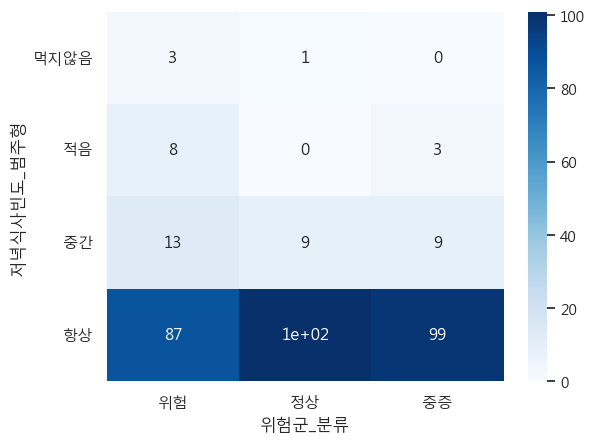

In [39]:
# 원본에서 '정상' 그룹의 크기가 많기 때문에 샘플 이용
ct = pd.crosstab(sample['저녁식사빈도_범주형'], sample['위험군_분류'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.yticks(rotation = 0)

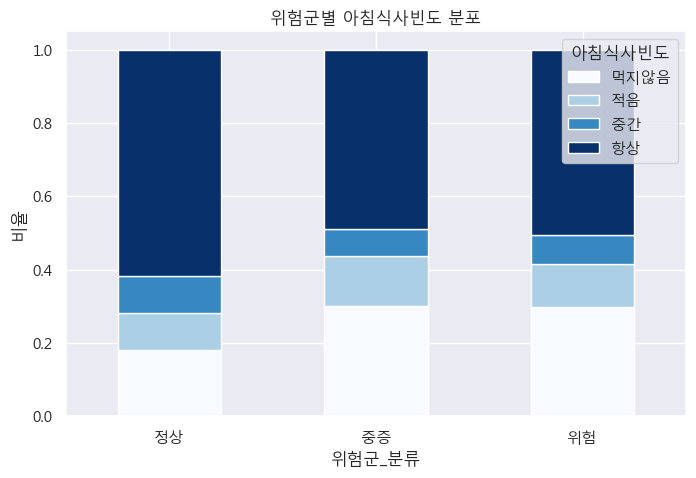

In [40]:
# 정상, 중증, 위험 순으로 정렬을 하기 위함.
order= ['정상', '중증', '위험']
data['위험군_분류'] = pd.Categorical(data['위험군_분류'], categories=order, ordered=True)

# 교차표 (비율 기반)
ct = pd.crosstab(data['위험군_분류'], data['아침식사빈도_범주형'], normalize='index')

# 시각화
ax = ct.loc[order].plot(kind='bar', stacked=True, colormap='Blues', figsize=(8, 5))
plt.ylabel('비율')
plt.title('위험군별 아침식사빈도 분포')
plt.legend(title='아침식사빈도')
plt.xticks(rotation=0)  

plt.show()

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='위험군_분류', ylabel='아침식사빈도_범주형'>

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


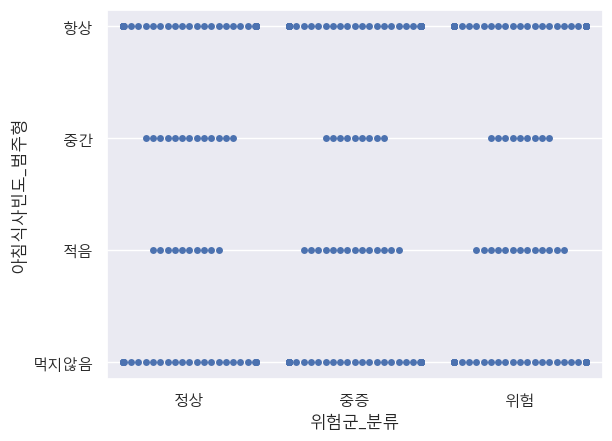

In [41]:
order = ['항상', '중간', '적음', '먹지않음']
sample['아침식사빈도_범주형'] = pd.Categorical(sample['아침식사빈도_범주형'], categories=order, ordered=True)
sns.swarmplot(data = sample, x = '위험군_분류', y = '아침식사빈도_범주형')

In [42]:
## (수정) 점심식사빈도 그래프 추출

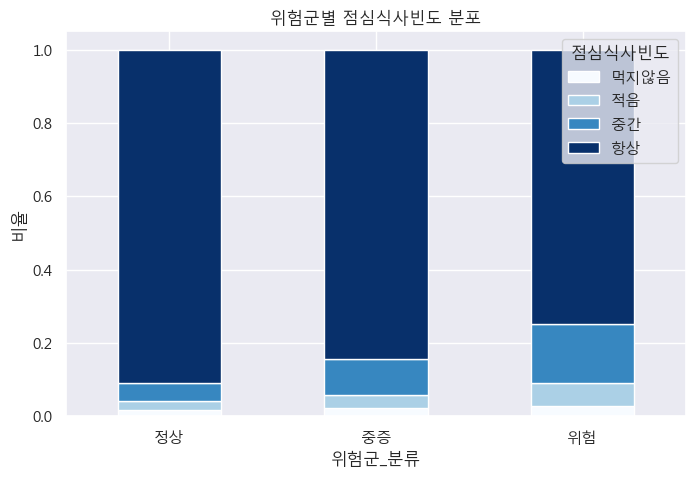

In [43]:
# 정상, 중증, 위험 순으로 정렬을 하기 위함.
order= ['정상', '중증', '위험']
data['위험군_분류'] = pd.Categorical(data['위험군_분류'], categories=order, ordered=True)

# 교차표 (비율 기반)
ct = pd.crosstab(data['위험군_분류'], data['점심식사빈도_범주형'], normalize='index')
# 시각화
ax = ct.loc[order].plot(kind='bar', stacked=True, colormap='Blues', figsize=(8, 5))
plt.ylabel('비율')
plt.title('위험군별 점심식사빈도 분포')
plt.legend(title='점심식사빈도')
plt.xticks(rotation=0)  

plt.show()

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='위험군_분류', ylabel='점심식사빈도_범주형'>

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


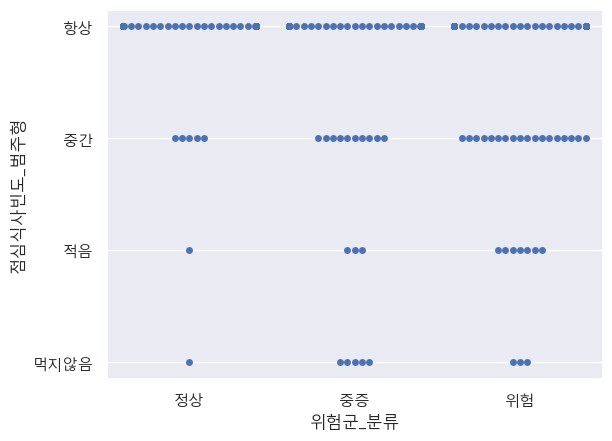

In [44]:
order = ['항상', '중간', '적음', '먹지않음']
sample['점심식사빈도_범주형'] = pd.Categorical(sample['점심식사빈도_범주형'], categories=order, ordered=True)
sns.swarmplot(data = sample, x = '위험군_분류', y = '점심식사빈도_범주형')

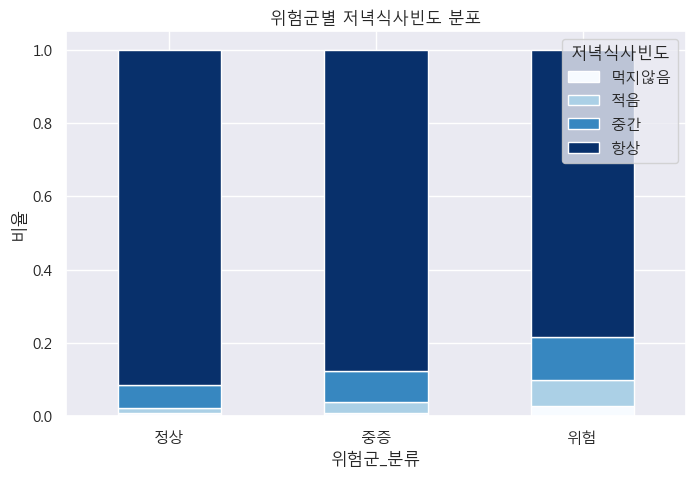

In [45]:
# 정상, 중증, 위험 순으로 정렬을 하기 위함.
order= ['정상', '중증', '위험']
data['위험군_분류'] = pd.Categorical(data['위험군_분류'], categories=order, ordered=True)
# 교차표 (비율 기반)
ct = pd.crosstab(data['위험군_분류'], data['저녁식사빈도_범주형'], normalize='index')

# 시각화
ax = ct.loc[order].plot(kind='bar', stacked=True, colormap='Blues', figsize=(8, 5))
plt.ylabel('비율')
plt.title('위험군별 저녁식사빈도 분포')
plt.legend(title='저녁식사빈도')
plt.xticks(rotation=0)  

plt.show()

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='위험군_분류', ylabel='저녁식사빈도_범주형'>

/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/idowon/Library/Mobile Documents/com~apple~CloudDocs/Study/2025-school/2025-data-literacy/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


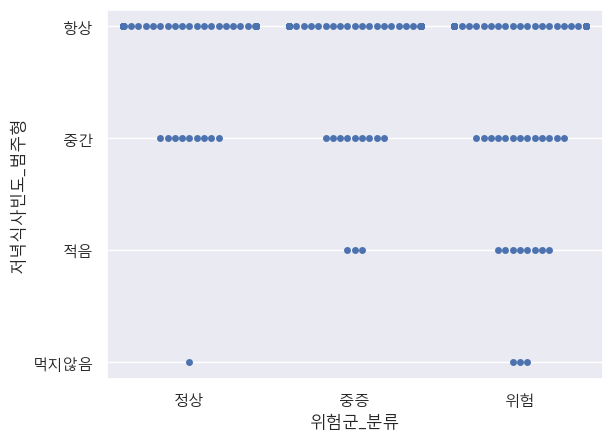

In [46]:
order = ['항상', '중간', '적음', '먹지않음']
sample['저녁식사빈도_범주형'] = pd.Categorical(sample['저녁식사빈도_범주형'], categories=order, ordered=True)
sns.swarmplot(data = sample, x = '위험군_분류', y = '저녁식사빈도_범주형')

## 3) 위험군 분류를 이용한 교차표 분석 
### (1) 교차표 분석
PHQ, GAD 점수에 따라 분류된 각 범주에 아침, 점심, 저녁의 빈도를 알아보기 위해 교차표 분석

In [47]:
#결측치 제거
data_filt = data.dropna(subset=['아침식사빈도', '점심식사빈도', '저녁식사빈도'])

In [48]:
#아침식사빈도
b_table = pd.crosstab(data.아침식사빈도, data.위험군_분류)
b_table

위험군_분류,정상,중증,위험
아침식사빈도,,,
1.0,2360,112,56
2.0,379,17,9
3.0,390,31,13
4.0,688,69,33


In [49]:
#점심식사빈도
l_table = pd.crosstab(data.점심식사빈도, data.위험군_분류)
l_table

위험군_분류,정상,중증,위험
점심식사빈도,,,
1.0,3474,193,83
2.0,184,23,18
3.0,89,8,7
4.0,70,5,3


In [50]:
#저녁식사빈도
d_table = pd.crosstab(data.저녁식사빈도, data.위험군_분류)
d_table

위험군_분류,정상,중증,위험
저녁식사빈도,,,
1.0,3495,201,87
2.0,237,19,13
3.0,53,7,8
4.0,32,2,3


### (2) chi^2 test를 통한 독립성 검정
두 변수간 통계적으로 유의미한 관계가 있는지 확인

In [51]:
b_chi2, b_p, b_dof, b_expected = stats.chi2_contingency(pd.crosstab(data['위험군_분류'], data['아침식사빈도']))
print(f'아침식사 chi^2 : {b_chi2}.2f, 아침식사 pvalue: {b_p}')

아침식사 chi^2 : 35.671258848506824.2f, 아침식사 pvalue: 3.1932817372400603e-06


In [52]:
l_chi2, l_p, l_dof, l_expected = stats.chi2_contingency(pd.crosstab(data['위험군_분류'], data['점심식사빈도']))
print(f'점심식사 chi^2 : {l_chi2}, 점심식사 pvalue: {l_p}')

점심식사 chi^2 : 47.89948916613023, 점심식사 pvalue: 1.2375347718026305e-08


In [53]:
d_chi2, d_p, d_dof, d_expected = stats.chi2_contingency(pd.crosstab(data['위험군_분류'], data['저녁식사빈도']))
print(f'저녁식사 chi^2 : {d_chi2}, 저녁식사 pvalue: {d_p}')

저녁식사 chi^2 : 38.1639391240943, 저녁식사 pvalue: 1.043431843995366e-06


# (수정) (3) 막대그래프를 사용한 시각화 p28

정신건강 상태와 식사빈도 사이의 규칙성 등을 직관적으로 확인하기 위해 barplot을 통해 확인

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_69655/625774517.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('위험군_분류')[['아침식사빈도', '점심식사빈도', '저녁식사빈도']].sum()
/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_69655/625774517.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, break_r[i] / 2, f'{break_r[i]:.2f}', ha='center', color='white', fontsize=12)
/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_69655/625774517.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

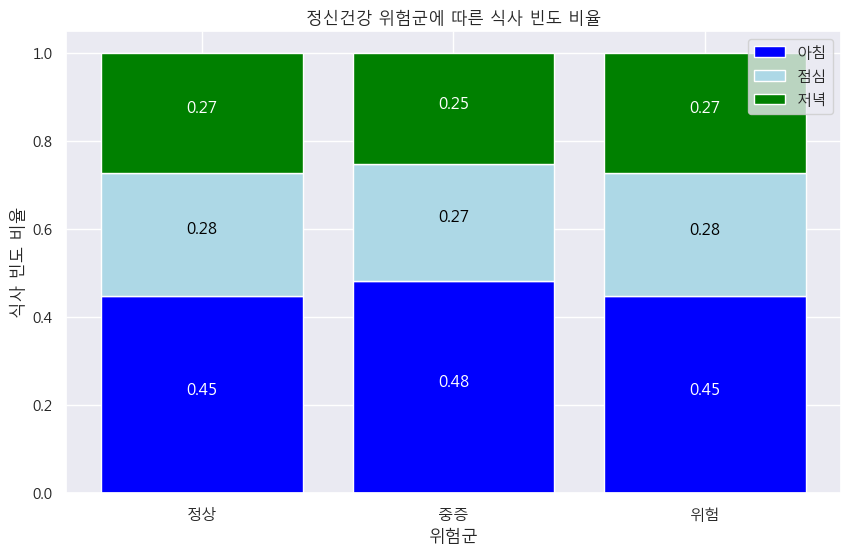

In [54]:
#위험군별식사 빈도 합계
grouped_data = data.groupby('위험군_분류')[['아침식사빈도', '점심식사빈도', '저녁식사빈도']].sum()
total_meal = grouped_data.sum(axis=1)

#각 식사 빈도의 비율 계산
break_r = grouped_data['아침식사빈도'] / total_meal
lunch_r = grouped_data['점심식사빈도'] / total_meal
dinner_r = grouped_data['저녁식사빈도'] / total_meal

#시각화
plt.figure(figsize=(10, 6))
p1 = plt.bar(grouped_data.index, break_r, color='blue', label='아침')
p2 = plt.bar(grouped_data.index, lunch_r, bottom=break_r, color='lightblue', label='점심')
p3 = plt.bar(grouped_data.index, dinner_r, bottom=break_r + lunch_r, color='green', label='저녁')


for i in range(len(grouped_data.index)):
    plt.text(i, break_r[i] / 2, f'{break_r[i]:.2f}', ha='center', color='white', fontsize=12)
    plt.text(i, break_r[i] + lunch_r[i] / 2, f'{lunch_r[i]:.2f}', ha='center', color='black', fontsize=12)
    plt.text(i, break_r[i] + lunch_r[i] + dinner_r[i] / 2, f'{dinner_r[i]:.2f}', ha='center', color='white', fontsize=12)

plt.title('정신건강 위험군에 따른 식사 빈도 비율')
plt.xlabel('위험군')
plt.ylabel('식사 빈도 비율')
plt.legend()
plt.show()

- 아침식사 비율은 중증 그룹에서 48%로 가장 높은 비율을 보이고 있으며 위험과 정상집단은 동일한 비율을 보이고 있다.

- 점심의 경우 모든 위험군에서 대부분 유사한 비율을 보이고 있다.

- 저녁의 경우 중증 집단에서 식사 비율이 가장 낮으며 위험과 정상집단은 동일한 비율을 나타내고 있다.


## 3) 식사빈도와 우울상관관계 분석
### (1) 교차표 분석

In [55]:
cross_break = pd.crosstab(data.아침식사빈도, data.스트레스_인지)
cross_break

스트레스_인지,0.0,1.0
아침식사빈도,,
1.0,2124,402
2.0,301,104
3.0,313,121
4.0,543,247


In [56]:
chi2, p, dof, expected = sp.stats.chi2_contingency(cross_break, correction = False)
print(f'chi^2 :',chi2 , 'pvalue :', p)

chi^2 : 107.15697967936589 pvalue : 4.4885433470671836e-23


In [57]:
cross_lunch = pd.crosstab(data.점심식사빈도,data.스트레스_인지)
cross_lunch

스트레스_인지,0.0,1.0
점심식사빈도,,
1.0,3000,749
2.0,152,73
3.0,69,34
4.0,60,18


In [58]:
chi2, p, dof, expected = sp.stats.chi2_contingency(cross_lunch, correction = False)
print(f'chi^2 :',chi2 , 'pvalue :', p)

chi^2 : 29.239551194959155 pvalue : 1.9943168006638117e-06


In [59]:
cross_dinner = pd.crosstab(data.저녁식사빈도, data.스트레스_인지 )
cross_dinner

스트레스_인지,0.0,1.0
저녁식사빈도,,
1.0,3006,775
2.0,199,70
3.0,49,19
4.0,27,10


In [60]:
chi2, p, dof, expected = sp.stats.chi2_contingency(cross_dinner, correction = False)
print(f'chi^2 :',chi2 , 'pvalue :', p)

chi^2 : 7.438859221025536 pvalue : 0.05915040702433681


### <가설검정>
H0: 아침(점심, 저녁)식사 빈도와 스트레스 정도 간의 상관관계가 없다.<br>
H1: 아침(점심, 저녁)식사 빈도와 스트레스 정도 간의 상관관계가 있다. 

아침식사, 점심식사 빈도의 경우 p-value 값이 0.05보다 작기때문에 통계적으로 유의미하나 저녁식사 빈도의 경우 p-value 값이 0.05 보다 크기때문에 통계적으로 의미가 없다고 할 수 있다. 

# (수정) (3) barplot 을 통한 시각화 p32-35
스트레스 인지 정도별 식사 빈도에 대한 분포를 확인

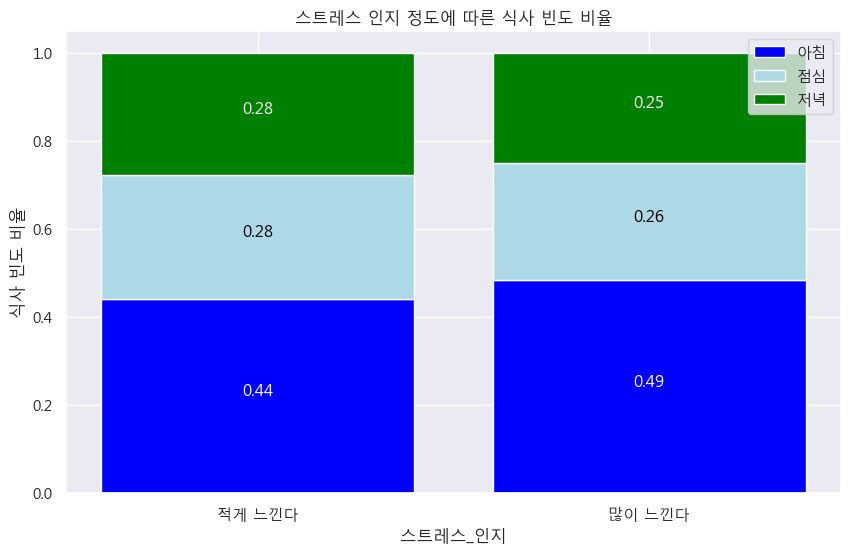

In [61]:
#스트레스 정도에 따른 식사 빈도 합계
grouped_data = data.groupby('스트레스_인지')[['아침식사빈도', '점심식사빈도', '저녁식사빈도']].sum()
total_meal = grouped_data.sum(axis=1)

#각 식사 빈도의 비율 계산
break_r = grouped_data['아침식사빈도'] / total_meal
lunch_r = grouped_data['점심식사빈도'] / total_meal
dinner_r = grouped_data['저녁식사빈도'] / total_meal

#시각화
plt.figure(figsize=(10, 6))
p1 = plt.bar(grouped_data.index, break_r, color='blue', label='아침')
p2 = plt.bar(grouped_data.index, lunch_r, bottom=break_r, color='lightblue', label='점심')
p3 = plt.bar(grouped_data.index, dinner_r, bottom=break_r + lunch_r, color='green', label='저녁')

for i in range(len(grouped_data.index)):
    plt.text(i, break_r[i] / 2, f'{break_r[i]:.2f}', ha='center', color='white', fontsize=12)
    plt.text(i, break_r[i] + lunch_r[i] / 2, f'{lunch_r[i]:.2f}', ha='center', color='black', fontsize=12)
    plt.text(i, break_r[i] + lunch_r[i] + dinner_r[i] / 2, f'{dinner_r[i]:.2f}', ha='center', color='white', fontsize=12)


plt.xticks(ticks=range(len(grouped_data.index)), labels=['적게 느낀다', '많이 느낀다'])
plt.title('스트레스 인지 정도에 따른 식사 빈도 비율')
plt.xlabel('스트레스_인지')
plt.ylabel('식사 빈도 비율')
plt.legend()
plt.show()

- 아침식사의 경우 스트레스를 많이 느끼는 그룹에서 비율이 더 높고(0.49), 스트레스를 적게 느끼는 그룹에서 많이 느끼는 그룹보다 약간 낮은 비율을 보인다.(0.45)

- 점심 식사의 경우 두 그룹에서 유사한 비율을 보인다. 이는 점심 식사가 두 그룹 모두에서 규칙적으로 유지 되고 있다고 볼 수 있다.

- 저녁식사의 경우 스트레스를 적게 느끼는 그룹에서 비율이 0.27로 약간 더 높았다.

## 2. 음주빈도

In [62]:
data['음주빈도_1년'] = data['음주빈도_1년'].replace(8, pd.NA)
data = data.dropna(subset=['음주빈도_1년'])

data['음주빈도_1년'].mode()[0]

4.000

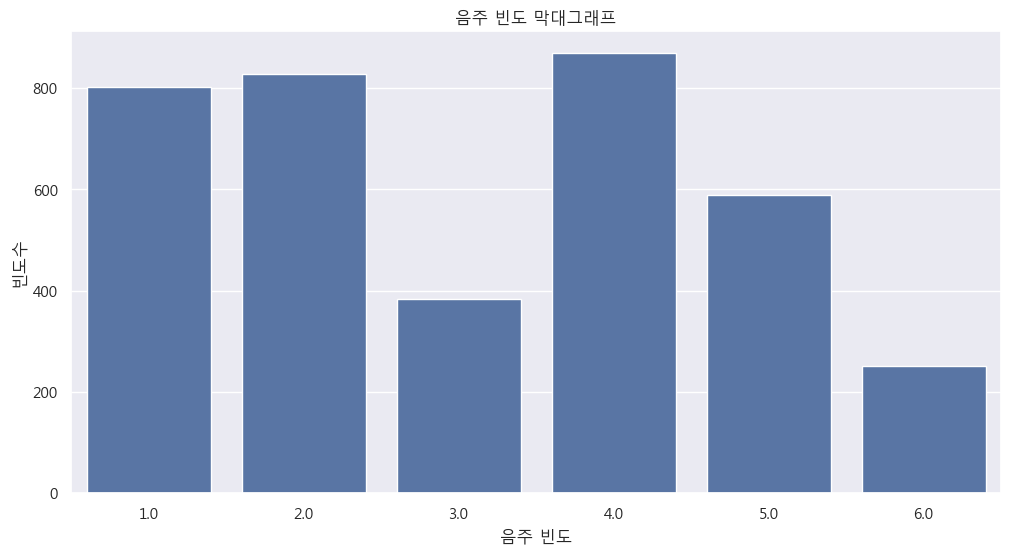

In [63]:
#음주빈도 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x=data['음주빈도_1년'])
plt.title("음주 빈도 막대그래프")
plt.xlabel("음주 빈도")
plt.ylabel("빈도수")
plt.show()

1: 최근 1년간 전혀 마시지 않았다
2: 월 1회 미만, 3: 월 1회정도, 4: 월 2-4회, 5:주 2~3회 정도, 6: 주 4회 이상

최빈값은 4로 월 2~4회 정도의 음주빈도가 가장 높게 나타났다

## (수정)라벨 분류

In [64]:
drink_cut = [1, 2, 4, 6, 7]   
data.loc[:, '음주빈도1년_분류'] = pd.cut(data['음주빈도_1년'], drink_cut, labels = ['비음주', '적음', '보통', '많음'], right = False)
data.head(5)

,PHQ_점수,GAD_점수,스트레스_인지,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,위험군_분류,아침식사빈도_범주형,점심식사빈도_범주형,저녁식사빈도_범주형,음주빈도1년_분류
0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,정상,항상,항상,항상,적음
1,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,정상,항상,항상,항상,적음
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,정상,항상,항상,항상,비음주
3,3.0,3.0,1.0,3.0,1.0,1.0,1.0,2.5,6.0,2.0,2.0,정상,적음,항상,항상,비음주
6,1.0,0.0,0.0,1.0,1.0,2.0,4.0,7.0,2.0,1.0,1.0,정상,항상,항상,중간,보통


### 1) 음주빈도와 PHQ, GAD 

In [65]:
A_PHQ_corr, A_PHQ_pvalue = stats.spearmanr(data['PHQ_점수'], data['음주빈도_1년'])
A_GAD_corr, A_GAD_pvalue = stats.spearmanr(data['GAD_점수'], data['음주빈도_1년'])

print(f'PHQ_corr: {A_PHQ_corr}, PHQ_pvalue: {A_PHQ_pvalue}')
print(f'GAD_corr: {A_GAD_corr}, GAD_pvalue: {A_GAD_pvalue}')

PHQ_corr: -0.019207279562663365, PHQ_pvalue: 0.24126496767830413
GAD_corr: 0.06034793085600327, GAD_pvalue: 0.00022885562235150416


### <가설 검정>
H0: 음주빈도와 정신건강(PHQ, GAD)간의 상관관계가 없다.<br>
H1: 음주빈도와 정신건강(PHQ, GAD)간의 상관관계가 있다.

음주빈도와 PHQ, GAD 점수간 pvalue 값이 0.05보다 크기 때문에 상관성이 없는 것 으로 나타났다.

## 2) 위험군 분류에 따른 음주 빈도
### (1) 교차분석

In [66]:
al_table = pd.crosstab(data.음주빈도_1년, data.위험군_분류)
al_table

위험군_분류,정상,중증,위험
음주빈도_1년,,,
1.0,735,41,26
2.0,756,55,18
3.0,362,11,10
4.0,804,43,22
5.0,539,35,15
6.0,224,19,9


# (수정) (2) barplot 을 이용한 시각화 p39

In [67]:
ct_ratio = pd.crosstab(data['위험군_분류'], data['음주빈도1년_분류'], normalize= 'index').round(3) * 100
ct_ratio

음주빈도1년_분류,비음주,적음,보통,많음
위험군_분류,,,,
정상,21.5,32.7,39.3,6.5
중증,20.1,32.4,38.2,9.3
위험,26.0,28.0,37.0,9.0


[21.5 20.1 26.  32.7 32.4 28.  39.3 38.2 37.   6.5  9.3  9. ]


<Axes: xlabel='위험군_분류', ylabel='비율'>

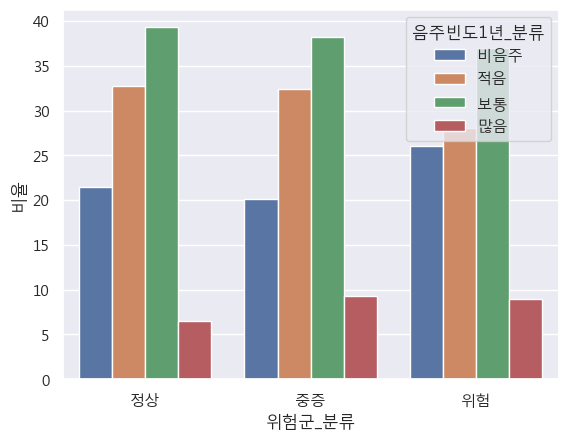

In [68]:
# 교차표 데이터를 .melt 함수로 재구조화 후 비율 시각화
ct_ratio = ct_ratio.reset_index().melt(id_vars='위험군_분류', var_name='음주빈도1년_분류', value_name='비율')
print(ct_ratio['비율'].unique())
sns.barplot(data=ct_ratio, x='위험군_분류', y='비율', hue='음주빈도1년_분류')


- 정상 집단의 경우 '보통'과 '적음' 수준의 음주 비율이 가장 높게 나타났으며, 이는 정상 집단의 다수가 규칙적으로 음주를 하고 있음을 보여준다.

- 위험 집단의 경우 '비음주'와 '적음' 비율이 상대적으로 높고, '많음' 수준의 음주는 매우 낮아 거의 음주를 하지 않을 가능성이 높다고 할 수 있다.

- 중증 집단 역시 '비음주'와 '적음' 비율이 높고, '많음' 수준의 음주는 낮아 위험 집단과 마찬가지로 음주 빈도가 낮은 것으로 나타났다.

이러한 결과는 정상 집단일수록 사회적 활동에 더 적극적으로 참여하기 때문일 것으로 예측된다.

In [742]:
chi2, p, dof, expected = sp.stats.chi2_contingency(al_table, correction = False)
print(f'chi^2 :', chi2 , 'pvalue :', p)

chi^2 : 12.456026848921349 pvalue : 0.2556945303900096


- Ho 위험군 분류집단(정상,위험,중증)과 음주빈도 간에는 독립적이다(상관성이 없다)-
- H1 위험군 분류집단(정상,위험,중증)과 음주빈도 간에는 독립적이지 않다(상관성이 있다)

카이스퀘어 값이 12.456이고 P값은 0.256이기 때문에 귀무가설을 기각할 수 없다. 따라서
두 변수간에 독립적이기 때문에 상관성이 없다

## 3) 음주빈도와 스트레스 인지
### (1) 교차분석

In [754]:
cross_al = pd.crosstab(data.음주빈도_1년, data.스트레스_인지)
cross_al

스트레스_인지,0.0,1.0
음주빈도_1년,,
1.0,687,161
2.0,699,178
3.0,331,85
4.0,706,216
5.0,467,155
6.0,198,70


### (2) heatmap 을 사용한 시각화

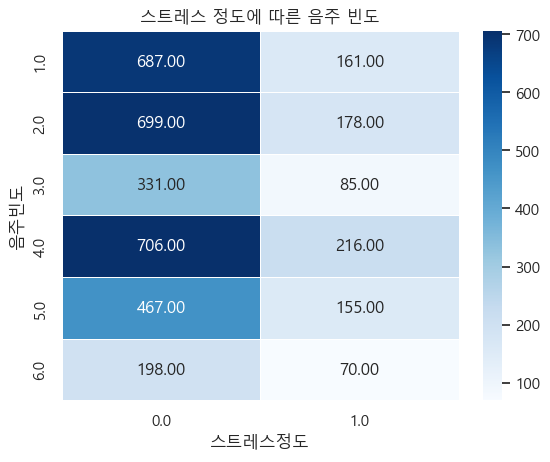

In [756]:
sns.heatmap(cross_al, annot=True, cmap = 'Blues' ,fmt='0.2f', linewidths=0.5)
plt.title('스트레스 정도에 따른 음주 빈도')
plt.xlabel('스트레스정도')
plt.ylabel('음주빈도')
plt.show()

- 스트레스가 적은 그룹의 경우 음주빈도가 다양하지만 4(월 2-4회)에서 가장 높은 빈도를 보이고 1(최근 1년간 전혀 마시지 않았다)
(2: 월 1회 미만) 에서도 높은 빈도를 보이고 있다.

- 스트레스가 많은 그룹의 경우 또한 4(월 2-4회)에서 높은 빈도를 보이고 1,2에서도 높은 값을 보이고 있으나 전반적으로
분산되어있는 경향을 보이고 있다. 이는 스트레스가 적은 그룹에 비해 불규칙성을 띄고있다고 할 수 있다.

### <가설검정>
H0: 음주빈도와 스트레스 인지 정도는 독립적이다(상관성이 없다).<br>
H1: 음주빈도와 스트레스 인지 정도는 독립적이지 않다(상관성이 있다).

chi^2 : 22.43 이고 pvalue 가 0.001 이기 때문에 두 변수는 독립적이지 않으므로 따라서 상관성이 있다고 
할 수 있다.

In [735]:
chi2, p, dof, expected = sp.stats.chi2_contingency(cross_al, correction = False)
print(f'chi^2 :', chi2 , 'pvalue :', p)

chi^2 : 13.422614625791226 pvalue : 0.019724437236604237


## 3) 물 섭취량

세계보건기구(WHO)는 하루 기준 1.5~ 2L 의 물 섭취를 권장하며, 이는 약 6~8컵에 해당된다.
해당 조사에서는 컵 단위를 사용하기 때문에 

-미달: 5컵 이하 <br>
-적정: 6~8 <br>
-과다: 9컵 이상 <br>

으로 범주를 분류하였다. 


In [161]:
data['물섭취량_하루'].describe()

count    3723.000000
mean        5.379506
std         3.055240
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        30.000000
Name: 물섭취량_하루, dtype: float64

#### 1) 물 섭취량에 따른 범주 구분

In [832]:
water = [(data.물섭취량_하루 >= 9 ), 
         (data.물섭취량_하루 < 9) & (data.물섭취량_하루 >=6 ), 
         (data.물섭취량_하루 < 6) & (data.물섭취량_하루 >= 0) ]
condition = [ '과다', '적정', '미달', ]

data

,PHQ_점수,GAD_점수,스트레스_인지,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,위험군_분류,물섭취_정도
0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,정상,미달
1,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,정상,미달
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,정상,미달
3,3.0,3.0,1.0,3.0,1.0,1.0,1.0,2.5,6.0,2.0,2.0,정상,미달
6,1.0,0.0,0.0,1.0,1.0,2.0,4.0,7.0,2.0,1.0,1.0,정상,적정
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.0,20.0,0.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,1.0,위험,미달
4407,5.0,16.0,1.0,4.0,1.0,2.0,4.0,5.0,7.0,5.0,2.0,위험,미달
4408,15.0,9.0,1.0,2.0,1.0,1.0,5.0,7.5,7.0,1.0,2.0,위험,적정
4409,9.0,21.0,1.0,1.0,1.0,1.0,1.0,7.5,2.0,1.0,1.0,위험,적정


C:\Users\user\AppData\Local\Temp\ipykernel_18788\4078844598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnt.index, y=cnt.values, palette='viridis')


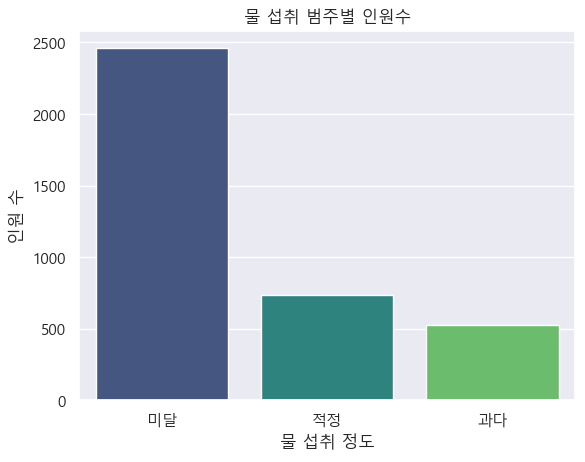

In [834]:
data['물섭취_정도'] = np.select(water, condition, default = np.nan)
data_water = data['물섭취_정도'].dropna()
data_water = data_water[data_water.isin(['미달', '적정', '과다'])]

cnt = data_water.value_counts().reindex(['미달', '적정', '과다'], fill_value=0)

sns.barplot(x=cnt.index, y=cnt.values, palette='viridis')
plt.title('물 섭취 범주별 인원수')
plt.xlabel('물 섭취 정도')
plt.ylabel('인원 수')
plt.show()

대부분의 사람들이 WHO 기준에 미달되는 정도의 물을 섭취하고 있다.

### 1) 위험군에 따른 물 섭취

In [860]:
#결측값 제거
data_cleaned = data[~data['물섭취_정도'].isin([None, 'nan', 'NaN', 'NAN'])]

cross_water = pd.crosstab(data_cleaned.물섭취_정도, data_cleaned.위험군_분류)
cross_water

위험군_분류,위험,정상,중증
물섭취_정도,,,
과다,13,489,26
미달,66,2247,146
적정,21,683,32


### (2) heatmap을 이용한 시각화

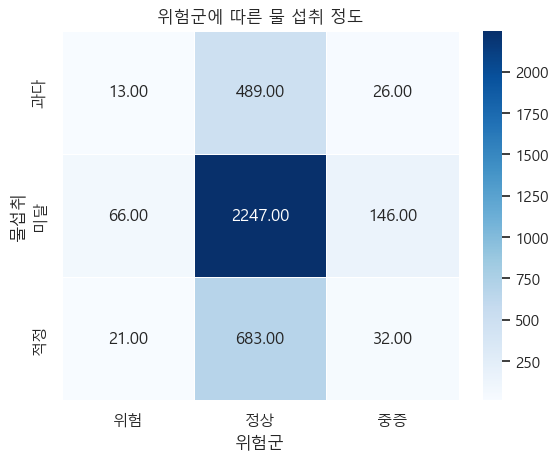

In [866]:
sns.heatmap(cross_water, annot=True, cmap = 'Blues' ,fmt='0.2f', linewidths=0.5)
plt.title('위험군에 따른 물 섭취 정도')
plt.xlabel('위험군')
plt.ylabel('물섭취')
plt.show()

- 모든 그룹에서 물 섭취 미달이 가장 많은 것으로 나타남
- 정상 그룹의 경우 물 섭취 미달인 경우가 많으나 과다 섭취, 적정 섭취 등 다양한 방식이 나타난다
- 중증 그룹에서는 물 섭취 미달이 가장 두드러지게 나타났다.
- 위험 그룹의 경우 미달이 많으면서 적정 물섭취도 낮은것으로 나타났다.

### 2) 물 섭취량과 PHQ, GAD의 상관관계

In [875]:
data_water = data[['PHQ_점수', '물섭취량_하루']].replace([np.inf, -np.inf], np.nan).dropna()

rho, p_val = stats.pearsonr(data_water['PHQ_점수'], data_water['물섭취량_하루'])
print(f'corr : {rho}, p-value : {p_val}')

corr : -0.0174710207563279, p-value : 0.2865402856284345


### <가설검정>
H0: 물 섭취량과 정신건강(PHQ, GAD)간의 상관관계가 없다.<br>
H1: 물 섭취량과 정신건강(PHQ, GAD)간의 상관관계가 있다.

하루 물섭취량의 경우 PHQ, GAD 점수 모두 상관관계가 거의 없는것으로 나타났다.

### 3) 하루 평균 물 섭취량과 스트레스 인지의 관계

C:\Users\user\AppData\Local\Temp\ipykernel_18788\63610407.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='스트레스_인지', y='물섭취량_하루', data=data, ci=None)


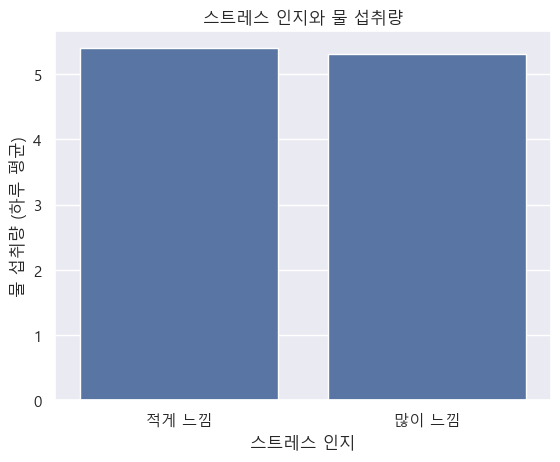

In [878]:
labels = {0: '적게 느낌', 1: '많이 느낌'}
sns.barplot(x='스트레스_인지', y='물섭취량_하루', data=data, ci=None)
plt.title("스트레스 인지와 물 섭취량")
plt.xlabel("스트레스 인지")
plt.ylabel("물 섭취량 (하루 평균)")

# X축 레이블 수정
plt.xticks(ticks=[0, 1], labels=[labels[0], labels[1]])

plt.show()

barplot을 통해서 스트레스 인지에 따른 물 섭취량의 차이는 거의 없는것으로 나타났으며 두 범주
모두 하루 평균 섭취량 5 수준으로 비슷한 수준으로 나타났다.

In [ ]:
low_stress = data[data['스트레스_인지'] == 0]['물섭취량_하루'].dropna()
high_stress = data[data['스트레스_인지'] == 1]['물섭취량_하루'].dropna()

t_stat, p_value = ttest_ind(low_stress, high_stress, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

### <가설검정>
H0: 스트레스를 적게 느끼는 집단과 많이 느끼는 집단 간의 물 섭취량의 차이가 없다. <br>
H1: 스트레스를 적게 느끼는 집단과 많이 느끼는 집단 간의 물 섭취량의 차이가 있다.

T-statistic이 양수이므로 첫 번째그룹의 평균이 더 높다고 볼 수 있으나 그 차이가 미미하고,
pvalue가 0.05 보다 크기 때문에 스트레스 인지 여부에 따른 물 섭취량의 차이가 통계적으로 유의미 하지 않다
즉, 스트레스 빈도에 따른 물 섭취량 평균에는 차이가 없다고 할 수 있다.

### 4) 과일섭취 빈도

In [155]:
# 결측값
data['과일섭취빈도_1년'] = data['과일섭취빈도_1년'].replace(99, pd.NA)
data = data.dropna(subset=['과일섭취빈도_1년'])


# 최빈값
mode_val = data['과일섭취빈도_1년'].mode()[0]
print("mode :", mode_val)

mode : 3.0


# (수정) x축 조정 47p 

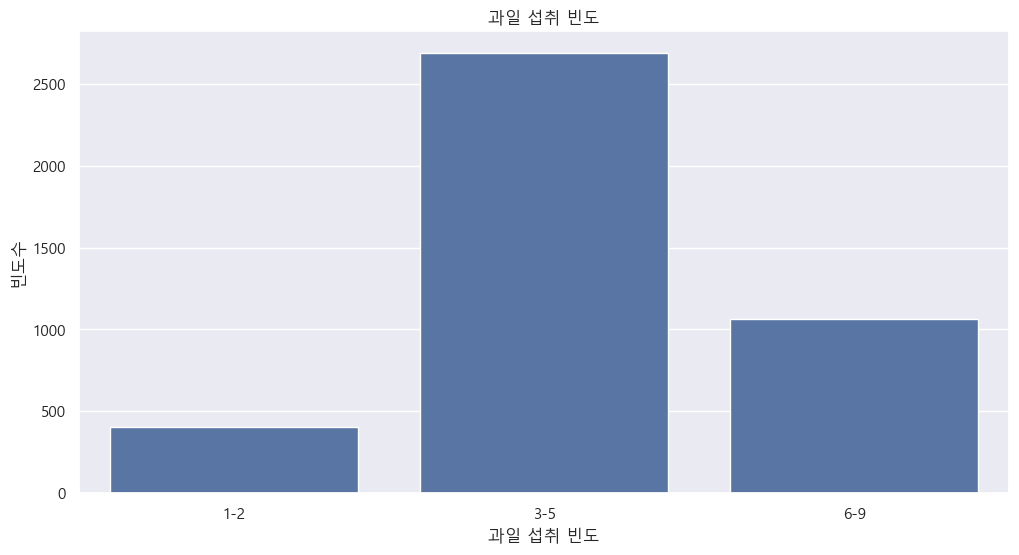

In [161]:
# 결측값 제거
data_fruit = data['과일섭취빈도_1년'].dropna()

#x 범주 설정
bins = [0,2,5,9]
labels = ['1-2', '3-5', '6-9']
data_fruit_labels = pd.cut(data_fruit, bins = bins, labels = labels, right = True)

# 과일 섭취 빈도 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x=data_fruit_labels, order = labels)
plt.title("과일 섭취 빈도")
plt.xlabel("과일 섭취 빈도")
plt.ylabel("빈도수")
plt.show()

1 : 하루 3회 이상, 2 : 하루 2회, 3: 하루 1회, 4: 주 5-6회, 5: 주 2-4회 <br> 
6 : 주 1회, 7: 월 2-3회, 8: 월 1회 , 9 : 거의 안한다(월 1회 미만)

3 : 하루 1회 섭취 가 가장 많은 빈도를 차지하는 것으로 나타났다.

### 1) 위험군 분류에 따른 과일 섭취

### (1) 교차분석

In [900]:
fruit_table = pd.crosstab(data.과일섭취빈도_1년, data.위험군_분류)
fruit_table

위험군_분류,위험,정상,중증
과일섭취빈도_1년,,,
1.0,0,45,3
2.0,13,259,14
3.0,23,1102,40
4.0,4,151,10
5.0,22,1011,57
6.0,4,436,36
7.0,10,230,16
8.0,14,106,11
9.0,10,78,17


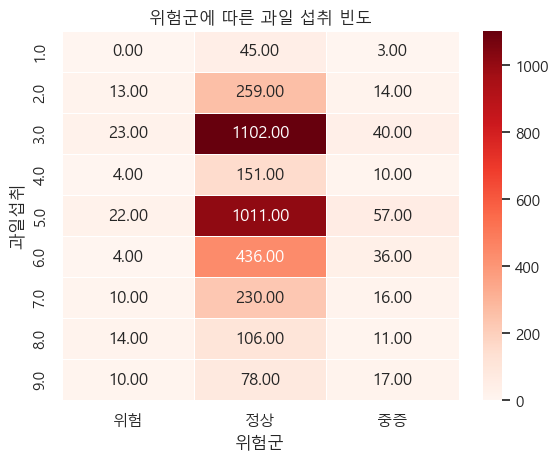

In [905]:
sns.heatmap(fruit_table, annot=True, cmap = 'Reds' ,fmt='0.2f', linewidths=0.5)
plt.title('위험군에 따른 과일 섭취 빈도')
plt.xlabel('위험군')
plt.ylabel('과일섭취')
plt.show()

- 정상 그룹의 경우 3(하루1회), 5(주 2-4회) 에서 가장 많으며 4(주4-6회)도 높은 편으로<br>
다양한 빈도에서 고른 분포가 나타나는것을 알 수 있다.

- 위험 그룹의 경우 섭취 빈도가 많지 않고 적정력 섭취가 이루어지지 않다고 나타났다.
3, 5 에서 비교적 높은 빈도가 나타났으나 그 이외의 빈드는 낮은 편으로 나타났다.

- 중증 그룹의 경우 3(하루1회)에서 가장 높았으며 그 외의 빈도는 낮아 과일섭취가 불규칙적이라 할 수 있다.

### 2) PHQ, GAD 점수와 과일섭취 빈도의 상관관계

In [894]:
data_fruit = data.dropna(subset=['PHQ_점수', '과일섭취빈도_1년', 'GAD_점수'])

F_PHQ_corr, F_PHQ_pvalue = stats.spearmanr(data['PHQ_점수'], data['과일섭취빈도_1년'])
F_GAD_corr, F_GAD_pvalue = stats.spearmanr(data['GAD_점수'], data['과일섭취빈도_1년'])

print(f'PHQ_corr: {F_PHQ_corr}, PHQ_pvalue: {F_PHQ_pvalue}')
print(f'GAD_corr: {F_GAD_corr}, GAD_pvalue: {F_GAD_pvalue}')

PHQ_corr: 0.10246640246999296, PHQ_pvalue: 3.711827000388679e-10
GAD_corr: 0.07970631480791483, GAD_pvalue: 1.1224800465909218e-06


### (1) 가설검정
H0: 과일섭취 빈도와 정신건강(PHQ,GAD)간의 상관관계가 없다.<br>
H1: 과일섭취 빈도와 정신건강(PHQ,GAD)간의 상관관계가 있다.

과일 섭취 빈도와 PHQ, GAD와의 관계에서 pvlaue 값은 유의미 하나 약한 상관관계가 있음을 알 수 있다.

### (2) 교차분석

In [925]:
cross_fruit = pd.crosstab(data.과일섭취빈도_1년,data.스트레스_인지)
cross_fruit

스트레스_인지,0.0,1.0
과일섭취빈도_1년,,
1.0,39,9
2.0,231,55
3.0,959,206
4.0,129,36
5.0,852,238
6.0,363,113
7.0,186,70
8.0,90,41
9.0,63,41


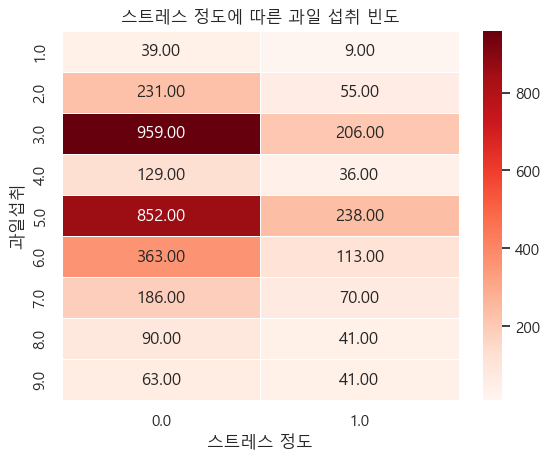

In [927]:
sns.heatmap(cross_fruit, annot=True, cmap = 'Reds' ,fmt='0.2f', linewidths=0.5)
plt.title('스트레스 정도에 따른 과일 섭취 빈도')
plt.xlabel('스트레스 정도')
plt.ylabel('과일섭취')
plt.show()

- 스트레스가 적은 경우 과일 섭취 빈도가 3(하루 1회), 5(주 2-4회)가 가장 높으며
  그외에서는 낮은 빈도를 보인다.

- 스트레스가 많은 경우 전반적으로 낮고 불규칙적인 섭취 패턴이 나타난다.

### <가설검정>
H0: 과일섭취 빈도와 스트레스 정도는 독립적이다(상관성이 없다).<br>
H1: 과일섭취 빈도와 스트레스 정도는 독립적이지 않다(상관성이 있다).

chi^2: 53.314 이고 pvalue가 0.05보다 작기 때문에 독립적이지 않다. 즉 상관성이 있다고 할 수 있다.

In [912]:
chi2, p, dof, expected = sp.stats.chi2_contingency(cross_fruit, correction = False)
print(f'chi^2 : {chi2}, pvalue: {p}')

chi^2 : 53.8660821193602, pvalue: 2.0017744997229546e-08


### 5) 채소섭취 빈도

In [915]:
# 결측값
data['채소섭취빈도_1년'] = data['채소섭취빈도_1년'].replace(99, pd.NA)
data = data.dropna(subset=['채소섭취빈도_1년'])

# 최빈값
mode_val = data['채소섭취빈도_1년'].mode()[0]
print("mode :", mode_val)

mode : 2.0


# (수정) hue 추가 p50

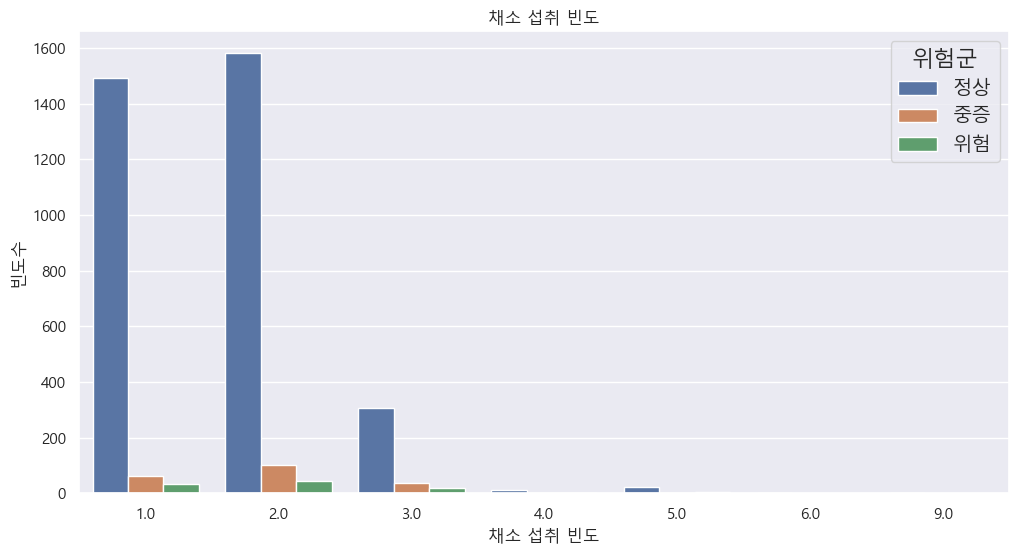

In [175]:
# 결측값 제거
data_veg = data['채소섭취빈도_1년'].dropna()

# 과일 섭취 빈도 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x=data_veg, hue = data['위험군_분류'] )
plt.title("채소 섭취 빈도")
plt.xlabel("채소 섭취 빈도")
plt.ylabel("빈도수")
plt.legend(title = '위험군', fontsize=14, title_fontsize = 16)
plt.show()

In [ ]:
1: 하루 3회 이상, 2: 하루 2회, 3: 하루 1회, 4: 주 5~6 회, 5: 주 2~4회, 6: 주 1회 , 7 : 월 2~3회
8 : 월 1회, 9 : 거의 안한다(월 1회 미만)
으로 대부분의 응답자가 채소를 하루 3회이상 또는 하루 2회이상 섭취하는 것으로 나타났다. 

In [554]:
V_PHQ_corr, V_PHQ_pvalue = stats.spearmanr(data['PHQ_점수'], data['채소섭취빈도_1년'])
V_GAD_corr, V_GAD_pvalue = stats.spearmanr(data['GAD_점수'], data['채소섭취빈도_1년'])

print(f'PHQ_corr: {V_PHQ_corr}, PHQ_pvalue: {V_PHQ_pvalue}')
print(f'GAD_corr: {V_GAD_corr}, GAD_pvalue: {V_GAD_pvalue}')

PHQ_corr: 0.1312199915613956, PHQ_pvalue: 2.0215856382184968e-17
GAD_corr: 0.17479985173108312, GAD_pvalue: 7.28317332980674e-30


### (1) 교차분석

In [932]:
cross_veg = pd.crosstab(data.채소섭취빈도_1년,data.위험군_분류)
cross_veg

위험군_분류,위험,정상,중증
채소섭취빈도_1년,,,
1.0,33,1493,62
2.0,43,1581,100
3.0,18,305,38
4.0,1,13,2
5.0,5,24,2
6.0,0,1,0
9.0,0,1,0


In [ ]:
### (2)heatmap을 이용한 시각화

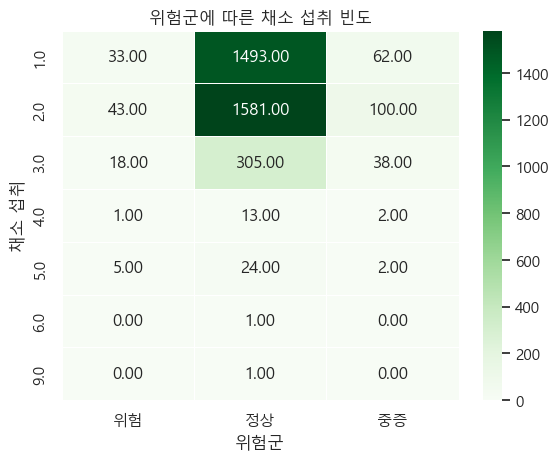

In [934]:
sns.heatmap(cross_veg, annot=True, cmap = 'Greens' ,fmt='0.2f', linewidths=0.5)
plt.title('위험군에 따른 채소 섭취 빈도')
plt.xlabel('위험군')
plt.ylabel('채소 섭취')
plt.show()

- 정상 그룹에서 채소 섭취가 1(하루 3회 이상), 2(하루 2회)로 대부분 규칙적으로 채소 섭취가 이루어 진다고
할 수 있다.

- 위험 그룹의 경우 주로 1(하루 3회 이상), 또는 2(하루 2회)로 나타나며 다른 빈도는 거의 없으며 이는 규칙적
채소 섭취가 이루어지지 않고 있다고 할 수 있다.

- 중증 그룹의 경우 1(하루 3회 이상: 62명), 2(하루 2회: 100명)으로 나타나지만 다른 빈도는 거의 없으며 
 규칙적 채소섭취가 이루어지지 않고 있다 할 수 있다.

### (3) 가설검정
H0: 채소섭취 빈도와 정신건강(PHQ, GAD)간의 상관관계가 없다.<br>
H1: 채소섭취 빈도와 정신건강(PHQ, GAD)간의 상관관계가 있다.

PHQ, GAD 점수와 채소 섭취 빈도에서 상관계수는 낮지만 통계적으로 유의미 하다고 할 수 있다. 

### 2) 채소섭취빈도와 스트레스 인지 

In [939]:
cross_veg = pd.crosstab(data.채소섭취빈도_1년, data.스트레스_인지)
cross_veg

스트레스_인지,0.0,1.0
채소섭취빈도_1년,,
1.0,1348,240
2.0,1288,435
3.0,240,121
4.0,12,4
5.0,22,9
6.0,1,0
9.0,1,0


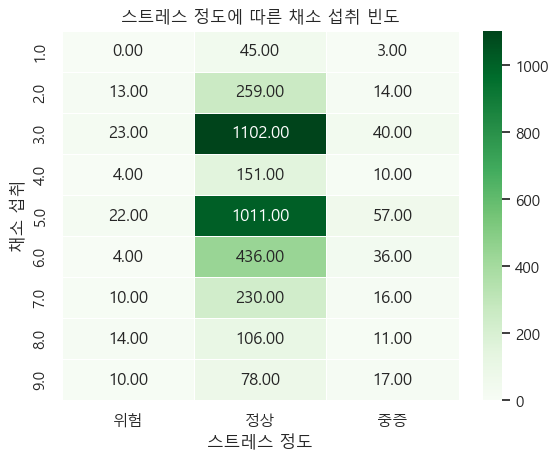

In [950]:
sns.heatmap(fruit_table, annot=True, cmap = 'Greens' ,fmt='0.2f', linewidths=0.5)
plt.title('스트레스 정도에 따른 채소 섭취 빈도')
plt.xlabel('스트레스 정도')
plt.ylabel('채소 섭취')
plt.show()

- 정상 그룹의 경우 3(하루 1회: 1102명), 5(주 2-4회: 1011명)으로 일정한 패턴을 보이며 규칙적으로 채소 섭취가
이루어지고 있다고 할 수 있다.

- 위험 그룹의 경우 3(23명) , 5(22명) 이지만 다른 빈도는 현저히 낮아 규칙적인 채소섭취가 이루어지지 않고있다고 
할 수 있다.

- 중증 그룹의 경우 3(40명), 5(57명) 이지만 다른 빈도에서 현저히 낮아 위험 그룹과 마찬가지로 규칙적 채소 섭취가
이루어지지 않고 있음을 알 수 있다.

### (3) 가설검정

In [945]:
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(data['위험군_분류'], data['아침식사빈도']))
print(f'chi^2 : {chi2}, pvalue: {p}')

chi^2 : 32.45547846744091, pvalue: 1.3343501282383119e-05


### <가설검정>
H0: 채소섭취빈도와 스트레스 정도 간 독립적이다(상관성이 없다).<br>
H1: 채소섭취빈도와 스트레스 정도 간 독립적이지 않다(상관성이 있다).

chi^2: 103.103, pvalue가 0.05보다 작기때문에 독립적이지 않다. 따라서 상관성이 있다고 할 수 있다.

## 6. 식이보충제 보충여부

## 1) 정신질환 위험군에 따른 식이보충제 섭취
### (1) 교차표 분석

In [958]:
d_table = pd.crosstab(data.식이보충제복용여부_1년, data.위험군_분류)
d_table

위험군_분류,위험,정상,중증
식이보충제복용여부_1년,,,
1.0,59,2448,132
2.0,41,970,72


### (2) 위험군에 따른 식이보충제 복용/미복용 여부 시각화

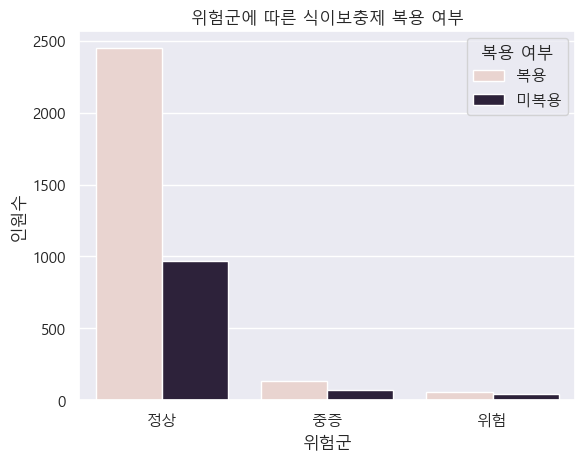

In [969]:
sns.countplot(x='위험군_분류', hue='식이보충제복용여부_1년', data=data)
plt.title("위험군에 따른 식이보충제 복용 여부")
plt.xlabel("위험군")
plt.ylabel("인원수")
plt.legend(title="복용 여부", labels=['복용', '미복용'])

plt.show()

- 정상 그룹에서 식이보충제 복용 비율이 가장 높으며, 위험과 중증 그룹에서도 복용자는 있으나 낮은 비율을 보인다.

### 2) 식이보충제 보충여부와 PHQ, GAD 점수간의 상관관계 분석

In [635]:
data_supply = data[['식이보충제복용여부_1년', 'PHQ_점수', 'GAD_점수']].dropna()

S_PHQ_corr, S_PHQ_pvalue = spearmanr(data_supply['식이보충제복용여부_1년'], data_supply['PHQ_점수'])
S_GAD_corr, S_GAD_pvalue = spearmanr(data_supply['식이보충제복용여부_1년'], data_supply['GAD_점수'])

print(f"PHQ 점수 스피어만 상관계수: {S_PHQ_corr}, p-value: {S_PHQ_pvalue}")
print(f"GAD 점수 스피어만 상관계수: {S_GAD_corr}, p-value: {S_GAD_pvalue}")

PHQ 점수 스피어만 상관계수: 0.009510030229883051, p-value: 0.5398850881918816
GAD 점수 스피어만 상관계수: -0.01804598925290297, p-value: 0.24472550012474234


### <가설검정>
H0: 식이보충제 보충여부와 정신건강(PHQ, GAD) 간의 상관성이 없다.<br>
H1: 식이보충제 보충여부와 정신건강(PHQ, GAD) 간의 상관성이 있다.

PHQ, GAD 모두 pvalue가 0.05 보다 크기때문에 상관관계가 없다.

### 2) 식이보충제 보충여부와 스트레스 인지

In [526]:
cross_supply = pd.crosstab(data.스트레스_인지, data.식이보충제복용여부_1년)
cross_supply

식이보충제복용여부_1년,1.0,2.0
스트레스_인지,,
0.0,2317,962
1.0,632,242


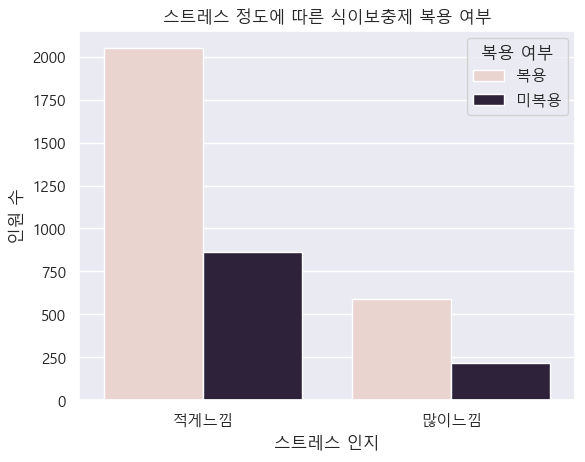

In [985]:
sns.countplot(x='스트레스_인지', hue='식이보충제복용여부_1년', data=data)

plt.xticks(ticks=[0,1], labels=['적게느낌', '많이느낌'])
plt.title("스트레스 정도에 따른 식이보충제 복용 여부")
plt.xlabel("스트레스 인지")
plt.ylabel("인원 수")
plt.legend(title="복용 여부", labels=['복용', '미복용'])

plt.show()

- 스트레스를 적게 느끼는 사람에서 식이 보충제 복용 비율이 훨씬 높으며 스트레스를 많이 느끼는 사람에서도
복용하는 인원은 있으나 전체적으로 인원수가 적고 복용하지 않는 경우와의 인원차이가 크지 않다.

### (3) 가설검정
H0: 식이보충제 보충 여부와 스트레스 인지는 독립적이다(상관성이 없다).<br>
H1: 식이보충제 보충 여부와 스트레스 인지는 독립적이지 않다(상관성이 있다).

chi^2: 0.911, pvalue : 0.339 로 pvalue가 0.05보다 크기 때문에 두 변수는 독립적이다(상관성이 없다).

In [991]:
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(data['스트레스_인지'], data['식이보충제복용여부_1년']))
print(f'chi^2 : {chi2}, pvalue: {p}')

chi^2 : 1.8981460262809529, pvalue: 0.16828598455209887
